---
<h1 align='center' style="color:green"> Credit Card Fraud Detection</h1>

---
### Goal
    The goal of this project is to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
    The ML Model neeed to classify bank transactions into legitimate and fraudulent.


 ### About this data set:
    The datasets contains transactions made by credit cards in September 2013 by european cardholders.
    This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.
    The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

  It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Steps:

  * Step 1: Import  Libraries and Data Set:
  * Step 2: Processing data
  * Step 3: Exploratory Analysis
  * Step 4: Feature selection and Data split
  * Step 5: Building classification models    

      *   Decision Tree
      *   K - Nearest Neighbor
      *   Logistic Regression
      *   SVM
      *   Random Forest Tree
      *   XGBoost
  * Step 6:Evaluation



## Step 1 - Import Libraries and Data Set:
in addition to the scikit-learn library whhich we use to perform the classification analysis, we also use several other packages and modules:

- **Pandas**:used for data structures and operations for manipulating numerical tables
- **Numpy**: used for numerical analysis
- **matplotlib.pyplot**: used for plotting data
- **seaborn**: used for data visualization (used on top of matplotlib library)
- **sklearn**: used in our kernel to split the set into a training and a testing set, to create the model, and to visualize the results.

We import the data from a csv file, and we load it into a pandas DataFrame object.**bold text**

### A. Importing Necessary Libraries

In [86]:
# import the necessary packages
import pandas as pd #data processing
import numpy as np #working with arrays
import matplotlib.pyplot as plt # data visualization
import seaborn as sns
from termcolor import colored as cl  #text customization
import itertools #advanced functionality on iterators

### B. Load The Data Set
In the following cells, we will import our dataset from a .csv file as a Pandas DataFrame.  Furthermore, we will begin exploring the dataset to gain an understanding of the type, quantity, and distribution of data in our dataset.  For this purpose, we will use Pandas' built-in describe feature, as well as parameter histograms and a correlation matrix.


[Download the dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data) that will be used to train a transaction classifier. Unzip it and put the content (creditcard.csv) under folder data


In [87]:
# Load the dataset from the csv file using pandas
df = pd.read_csv('sample_data/creditcard.csv')
print(df.shape)
print(df.head())

(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V

In [88]:
# Start exploring the dataset
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [89]:
# take random rows for data
df = df.sample(frac=0.1, random_state = 1)  # frac=0.1 means choose random float value
df.head()
# V1 - V28 are the results of a PCA Dimensionality reduction to protect user identities and sensitive features

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0


In [90]:
# Print the shape of the data
print(df.shape)

(28481, 31)


In [91]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94705.035216     -0.001143     -0.018290      0.000795      0.000350   
std     47584.727034      1.994661      1.709050      1.522313      1.420003   
min         0.000000    -40.470142    -63.344698    -31.813586     -5.266509   
25%     53924.000000     -0.908809     -0.610322     -0.892884     -0.847370   
50%     84551.000000      0.031139      0.051775      0.178943     -0.017692   
75%    139392.000000      1.320048      0.792685      1.035197      0.737312   
max    172784.000000      2.411499     17.418649      4.069865     16.715537   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean      -0.015666      0.003634     -0.008523     -0.003040      0.014536   
std        1.395552      1.334985      1.2

## Step-2: Data Processing
In the following cells, we will import our dataset from a .csv file as a Pandas DataFrame.  Furthermore, we will begin exploring the dataset to gain an understanding of the type, quantity, and distribution of data in our dataset.  For this purpose, we will use Pandas' built-in describe feature, as well as parameter histograms and a correlation matrix.

### Missing Data: Handle NaN Values
    Three way to Handle NaN:1. Drop row or 2. fill with '0' or fill with mean and median
    Check for missing values in your dataset and decide on an appropriate strategy for handling them (e.g., imputation or removal).

In [92]:
df.isnull().values.any()

False

##### Intuition
- No null values in data.

In [93]:
df.isna().sum()  # no null value in any columns
# data= data.dropna()
# data.shape


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [94]:
# Is there any cateorigical Value are present? If yes, then convert to Neumeric Value
obj_cols = df.loc[:, df.dtypes == object]
obj_cols

""
169876
127467
137900
21513
134700
...
2032
240932
3701
153365


In [95]:
df.info()  # No null value so we start plotting

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28481 entries, 169876 to 97365
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    28481 non-null  float64
 1   V1      28481 non-null  float64
 2   V2      28481 non-null  float64
 3   V3      28481 non-null  float64
 4   V4      28481 non-null  float64
 5   V5      28481 non-null  float64
 6   V6      28481 non-null  float64
 7   V7      28481 non-null  float64
 8   V8      28481 non-null  float64
 9   V9      28481 non-null  float64
 10  V10     28481 non-null  float64
 11  V11     28481 non-null  float64
 12  V12     28481 non-null  float64
 13  V13     28481 non-null  float64
 14  V14     28481 non-null  float64
 15  V15     28481 non-null  float64
 16  V16     28481 non-null  float64
 17  V17     28481 non-null  float64
 18  V18     28481 non-null  float64
 19  V19     28481 non-null  float64
 20  V20     28481 non-null  float64
 21  V21     28481 non-null  float6

## Step 3-Exploratory Data Analysis

### A. Data Visualization

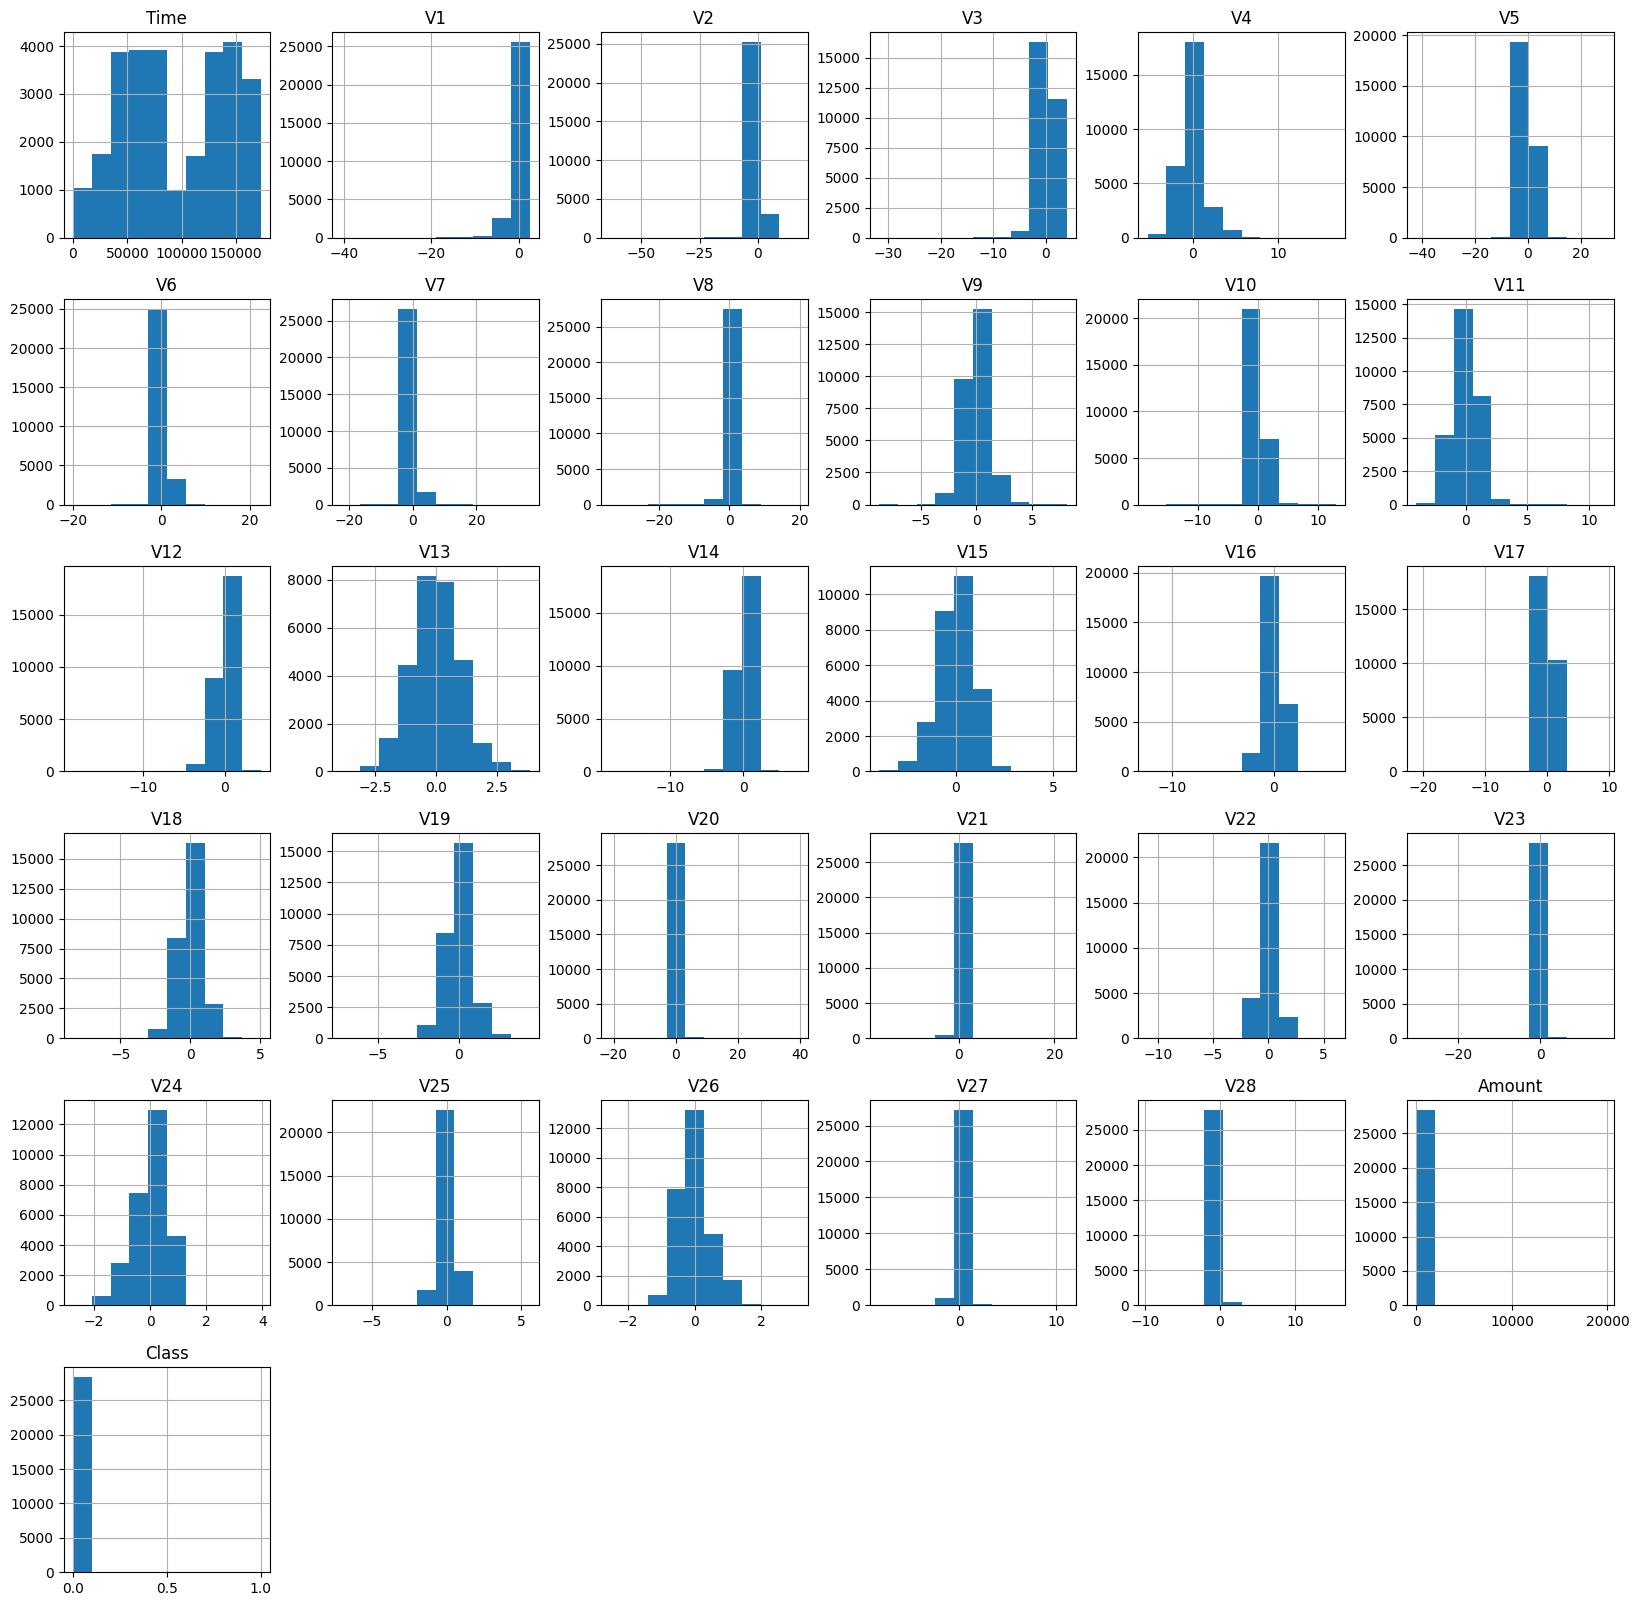

In [96]:
# Plot histograms of each parameter
df.hist(figsize = (20, 20))
plt.show()

## Analysis of Target Variable

### Number of Genuine and Fraud Transactions

In [97]:
# Determine number of fraud cases in dataset

Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases       : {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

0.0017234102419808666
Fraud Cases       : 49
Valid Transactions: 28432


In [98]:
perc_genuine = (len(Valid)/(len(Valid)+len(Fraud)))*100
print('Number of Genuine Transactions = {} and the percentage of genuine transactions = {:.3f} %'.format(len(Valid),perc_genuine))
perc_fraud = (len(Fraud)/(len(Valid)+len(Fraud)))*100
print('Number of fraud Transactions = {} and the percentage of fraud transactions = {:.3f} %'.format(len(Fraud),perc_fraud))

Number of Genuine Transactions = 28432 and the percentage of genuine transactions = 99.828 %
Number of fraud Transactions = 49 and the percentage of fraud transactions = 0.172 %


### Histogram of target variable

> Indented block


<Axes: xlabel='Class', ylabel='count'>

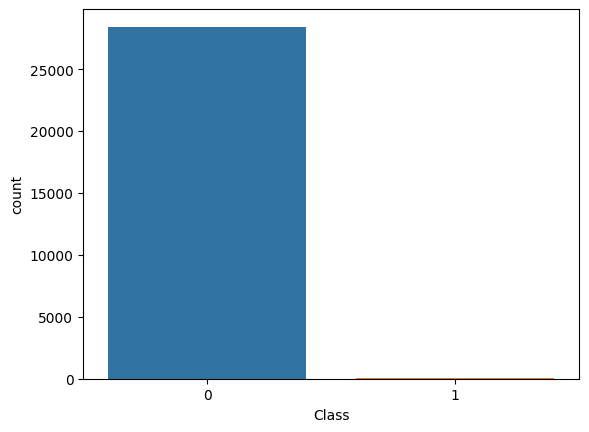

In [99]:
sns.countplot(data=df, x='Class')

##### Intuition
- Highly unbalanced data.

In [100]:
Fraud.Amount.describe()

count      49.000000
mean      173.505306
std       387.996569
min         0.000000
25%         1.000000
50%         4.900000
75%       122.680000
max      2125.870000
Name: Amount, dtype: float64

In [101]:
Valid.Amount.describe()

count    28432.000000
mean        89.813898
std        270.636594
min          0.000000
25%          5.990000
50%         22.380000
75%         78.820000
max      19656.530000
Name: Amount, dtype: float64

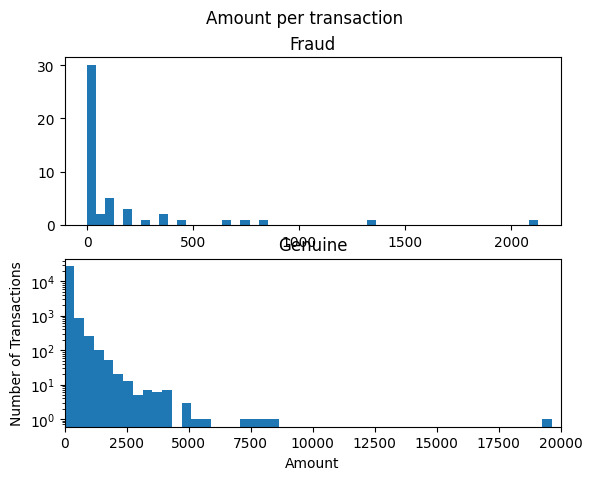

In [102]:
plot,(axis1, axis2) = plt.subplots(2, 1)
axis1.hist(Fraud.Amount, bins = 50)
axis1.set_title('Fraud')
axis2.hist(Valid.Amount, bins = 50)
axis2.set_title('Genuine')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plot.suptitle('Amount per transaction')
plt.yscale('log')
plt.show()

##### Intuition
- Fraud transactions is usually small amount.

## Analyzing particular features
The only features that are not PCA transformed are Time and Amount.
Analyzing Time (if fraud transactions occur more often during a certain time period) and Amount (if there is any correlation of amount with fraud transactions).

### Amount

<ipython-input-103-28cc6a1d425b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Amount)


<Axes: title={'center': 'Distribution of Monetary Value Feature'}, xlabel='Amount', ylabel='Density'>

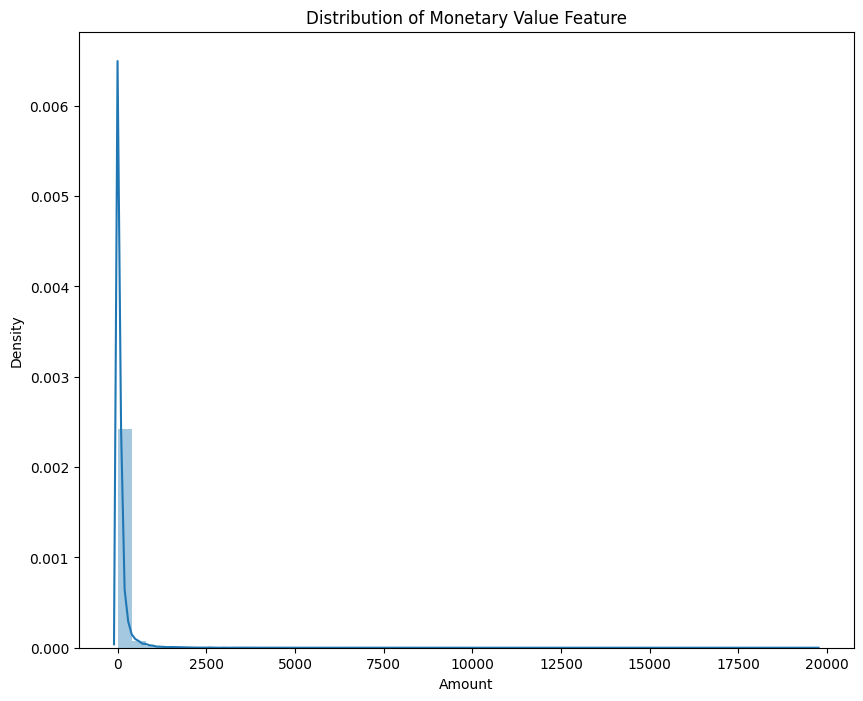

In [103]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

### Time

<ipython-input-104-1d45fc3f5a88>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Time)


<Axes: title={'center': 'Distribution of Time Feature'}, xlabel='Time', ylabel='Density'>

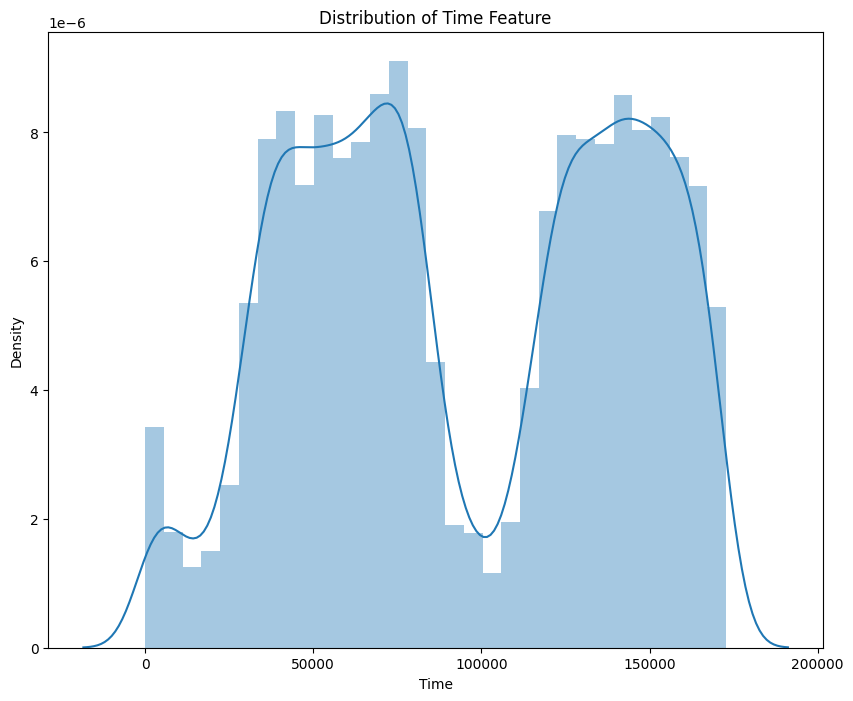

In [104]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

#### Visualizing Time with respect to class

Text(0.5, 0.98, 'Time vs Amount of transaction')

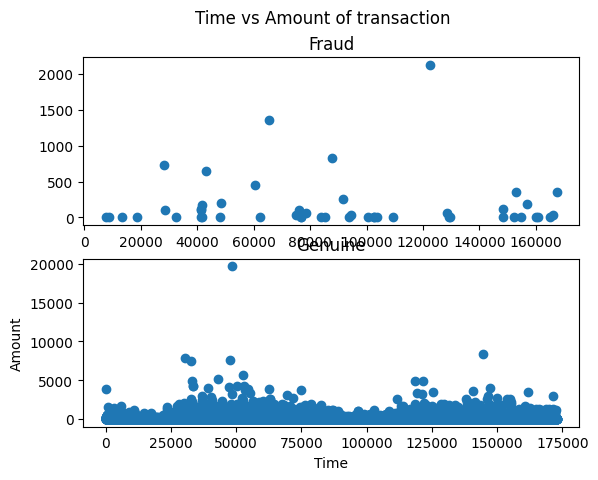

In [105]:
plot, (axis1, axis2) = plt.subplots(2, 1)
axis1.scatter(Fraud.Time, Fraud.Amount)
axis1.set_title('Fraud')
axis2.scatter(Valid.Time, Valid.Amount)
axis2.set_title('Genuine')
plt.xlabel('Time')
plt.ylabel('Amount')
plot.suptitle('Time vs Amount of transaction')
#plt.show();

##### Intuition
- Time of transaction doesn't seem to matter.

### Correlation
Visualization of correlation of all features of dataset

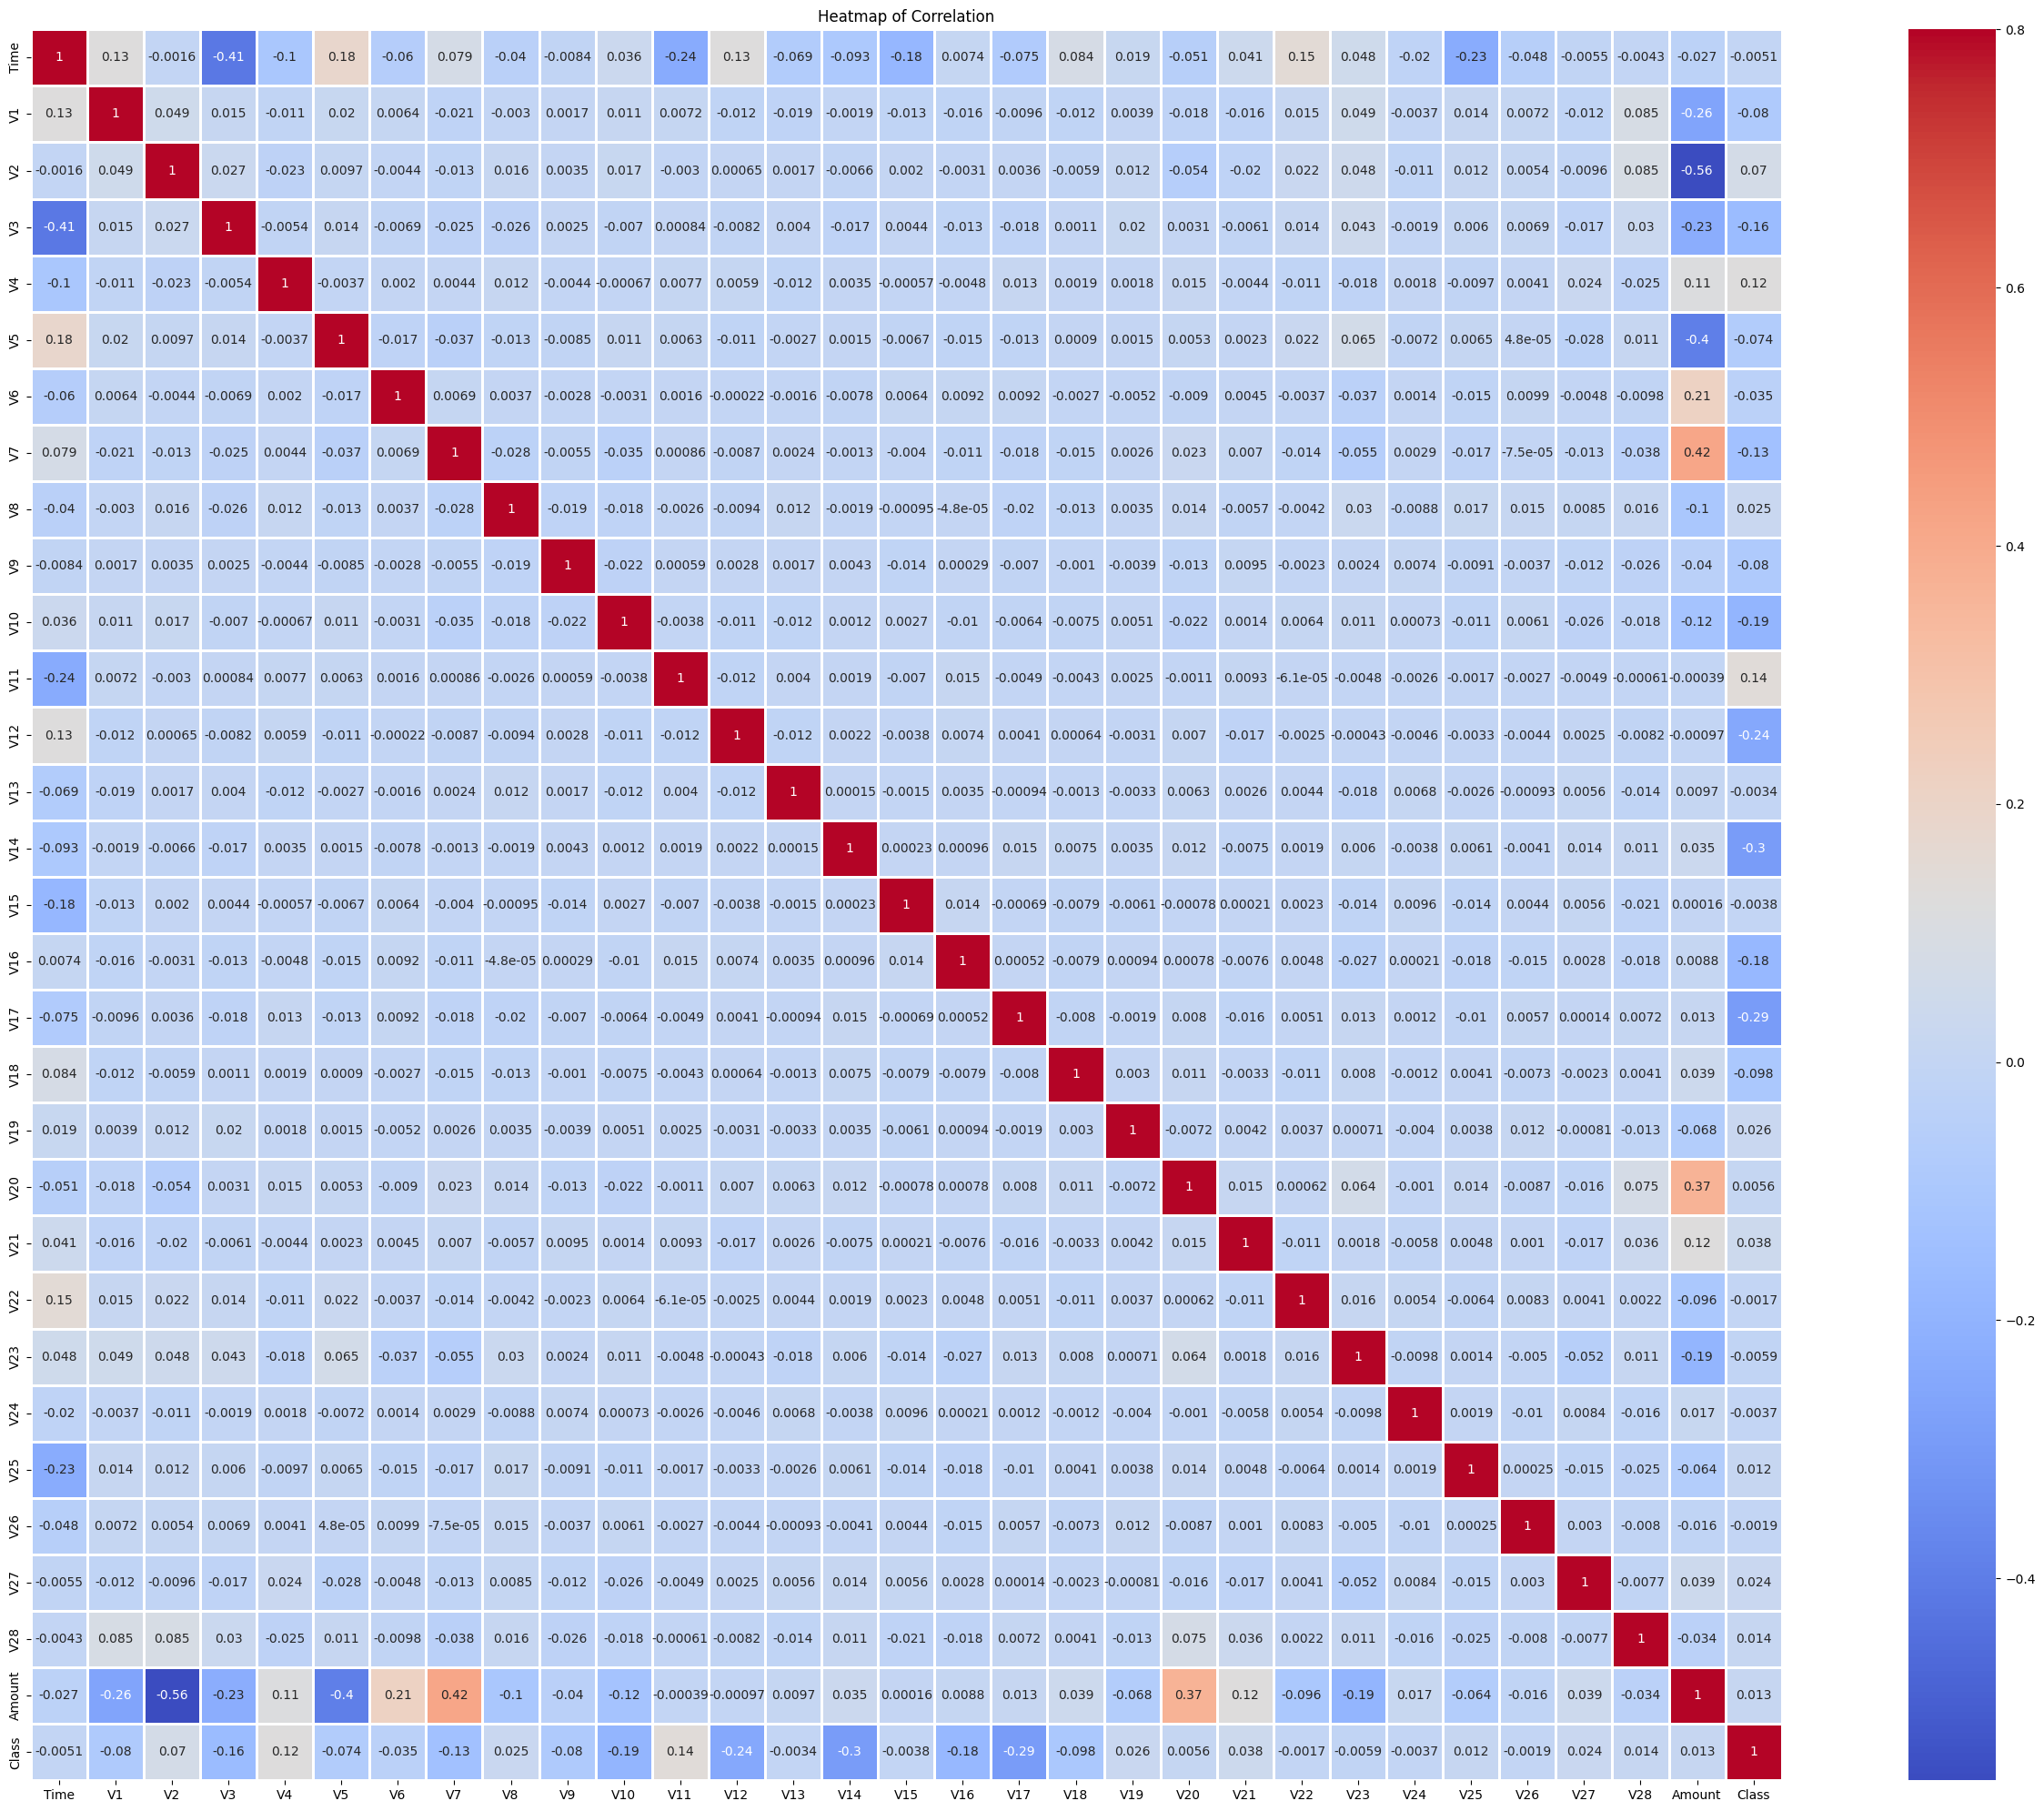

In [106]:
## Correlation matrix
corrmat=df.corr()
fig=plt.figure(figsize=(36,25))
sns.heatmap(corrmat, vmax = .8, square = True,annot=True,cmap="coolwarm",linewidth=2)
plt.title('Heatmap of Correlation')
plt.show()
#Data not correlated, because parameters were derived from PCA

<ipython-input-107-d79425153c05>:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.4`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(Fraud[column], bw = 0.4, label = "Fraudulent", shade=True, color="r", linestyle="--")
<ipython-input-107-d79425153c05>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Fraud[column], bw = 0.4, label = "Fraudulent", shade=True, color="r", linestyle="--")
<ipython-input-107-d79425153c05>:9: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.4`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(Valid[column], bw = 0.4, label = "Non Fraudulent", shade=True,

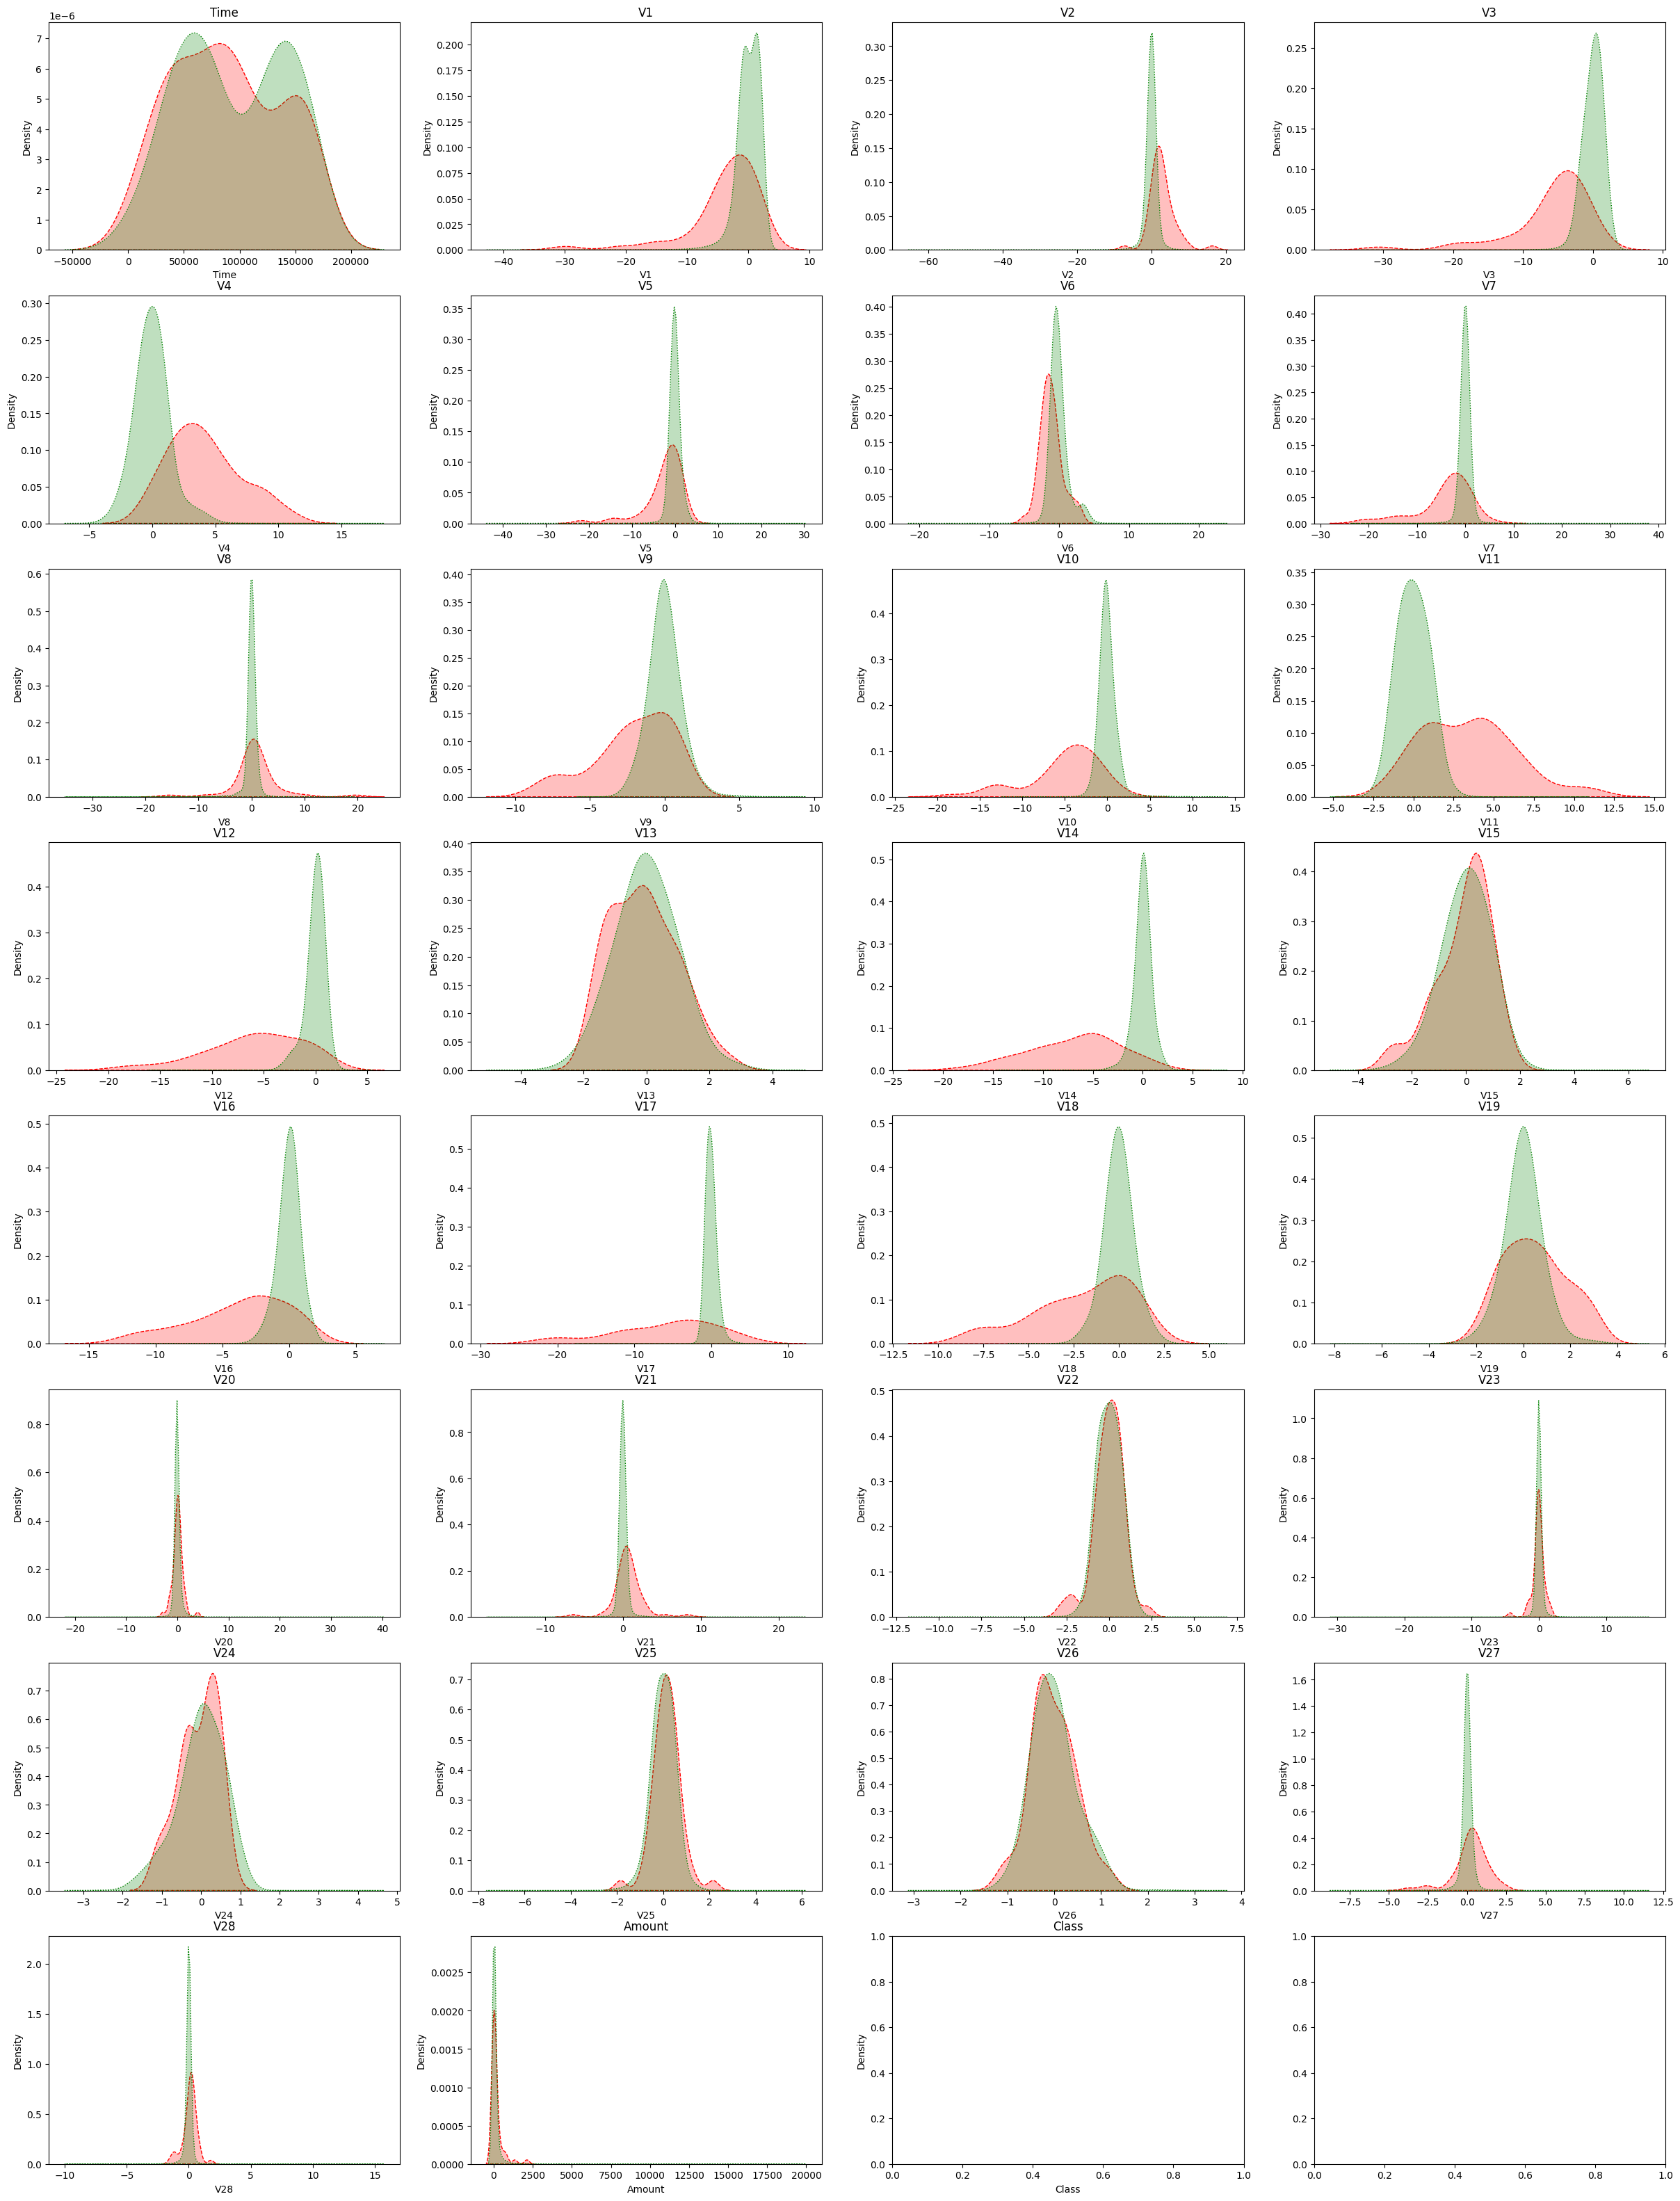

In [107]:
#Data not correlated, because parameters were derived from PCA
#Visualize column contents by fraud/legit to see if column adds value
columns = df.columns.values
counter = 1
fig, ax = plt.subplots(8,4,figsize=(30,40))
for column in columns:
    plt.subplot(8,4,counter)
    sns.kdeplot(Fraud[column], bw = 0.4, label = "Fraudulent", shade=True, color="r", linestyle="--")
    sns.kdeplot(Valid[column], bw = 0.4, label = "Non Fraudulent", shade=True, color= "g", linestyle=":")
    plt.title(column, fontsize=12)
    counter=counter + 1
plt.show();

 ## Step 4- Feature selection and Data split

In [108]:
from sklearn.preprocessing import StandardScaler #data normalisation
from sklearn.model_selection import train_test_split #data split


### Feature Scaling

#### Values in 'Amount' variable vary enormously compared to other variables. To reduce the wide range of values we apply normalisation as a method of **feature scaling** using the standard scaler method from the sklearn preprocessing module in python.

In [82]:
scaler_1 = StandardScaler()
scaler_2 = StandardScaler()

In [109]:
#scaling time
# scaled_time = scaler_1.fit_transform(df[['Time']])
# flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
# scaled_time = pd.Series(flat_list1)

# sc = StandardScaler()
amount = df['Amount'].values
#amount reshape(-1,1) means each element within amount as a list containing 1 element)
df['Amount'] = scaler_1.fit_transform(amount.reshape(-1, 1))
print(cl(df['Amount'].head(10), attrs = ['bold']))

169876   -0.325475
127467   -0.324774
137900   -0.328797
21513    -0.273092
134700   -0.329277
196117   -0.074044
24533    -0.307903
13629    -0.328391
246673   -0.021440
91842    -0.268441
Name: Amount, dtype: float64


In [110]:
#scaling the amount column
time = df['Time'].values
#amount reshape(-1,1) means each element within amount as a list containing 1 element)
df['Time'] = scaler_2.fit_transform(time.reshape(-1, 1))
print(cl(df['Time'].head(10), attrs = ['bold']))


# scaled_amount = scaler_2.fit_transform(df[['Amount']])
# flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
# scaled_amount = pd.Series(flat_list2)

169876    0.529632
127467   -0.343920
137900   -0.258975
21513    -1.323726
134700   -0.289637
196117    0.770407
24533    -1.291005
13629    -1.482582
246673    1.230899
91842    -0.652659
Name: Time, dtype: float64


In [111]:
# #concatenating newly created columns w original df
# df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
# df.sample(5)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.529632,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.325475,0
127467,-0.343920,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.324774,0
137900,-0.258975,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.328797,0
21513,-1.323726,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.273092,0
134700,-0.289637,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.329277,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,-1.957197,-0.615776,0.654356,2.618793,0.857434,-0.487340,0.593957,-0.095191,0.426786,0.011607,...,0.010440,0.113631,-0.313035,-0.015388,0.213878,-0.268579,0.117815,0.075734,-0.295204,0
240932,1.179138,-3.517229,3.326821,-3.590262,0.674769,-0.679266,-0.469516,-1.135362,2.778095,-2.404956,...,0.455767,0.388102,0.268986,0.382692,-0.653335,2.192962,-0.953907,-0.137082,-0.329277,0
3701,-1.923677,-0.315540,1.054303,1.484711,1.138262,0.394713,-0.168883,0.737923,-0.061284,-0.952381,...,0.005626,0.094740,0.024370,0.091800,-0.463470,-0.457328,0.194541,0.166039,-0.259729,0
153365,0.085049,-3.580417,4.100916,-2.577720,-1.476718,-0.006201,-2.008418,0.887262,0.304192,2.879710,...,-0.194866,0.571678,-0.001519,0.009117,0.321669,0.034900,0.785417,0.353092,-0.328687,0


###  DataSplit
This step involves definining out dependent and Independent variables X and Y respectively.
This would help us to split the data into a **training** set and **testing** set which is used for modelling and evaluating

Use the **train_test_split** algorithm from the **sklearn.model_selection** module to split data

* The X data used for training would be **x_train** and Y data used for training **Y_train** and the same for **test**. This is known as out of sample testing

* We would run the x_train and y_train data through our Machine Learning Algorithm to generate a model

* x_test values would be tested against the model and checked to see if y_test values are obtained

In [112]:
#Data Split

#X which would be all values within data frame except the 'Class' column
X = df.drop('Class', axis = 1).values

#y which are all values within the class columns
y = df['Class'].values

#test_size means 20% of our data is going to be used a means for testing our model generated from the algorithm.
#This means 80% of our data is going to be used to train our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(cl('X_train samples: ', attrs =  ['bold']), X_train[:1])
print(cl('X_test samples: ', attrs=['bold']), X_test[0:1])
print(cl('y_train samples: ', attrs=['bold']), y_train[0:20])
print(cl('y_test samples: ', attrs=['bold']), y_test[0:20])

X_train samples:  [[-1.11359188 -5.3081214  -6.56446459  2.30167074  1.00215622  3.92546816
  -3.70234848 -3.13262237  0.69052482 -1.0302469   0.5233424   0.55353894
  -0.43407627 -1.736561    0.71539888  0.14091062 -0.68180138 -0.60481086
   2.58011991 -1.83870752  1.4712462   0.49008708 -0.55890234  1.52031972
   0.37697493  0.66404042 -0.44028695 -0.24393833  0.20206381  0.70893058]]
X_test samples:  [[ 0.64731916 -0.6213222  -0.24269489  1.39118514 -3.36580976 -0.11885294
   0.38329086 -0.23375763  0.17327675 -2.39368903  0.71282559  0.08447171
  -0.18209773  1.43855828 -0.80258929 -1.39084079  0.07195285 -0.3405673
   0.69434331 -0.26024211 -0.07693624 -0.17594458 -0.03560842 -0.43051126
   0.09365464  0.77120841 -0.13675015  0.27482097  0.10510658 -0.28778442]]
y_train samples:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_test samples:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [116]:
# Print shapes
print("X shape : ",X.shape)
print("Y shape : ",y.shape)
print("X Train shape : ",X_train.shape)
print("X Test shape : ",X_test.shape)
print("Y train shape : ",y_train.shape)
print("Y test shape : ",y_test.shape)

X shape :  (28481, 30)
Y shape :  (28481,)
X Train shape :  (22784, 30)
X Test shape :  (5697, 30)
Y train shape :  (22784,)
Y test shape :  (5697,)


## Step -5: Building classification models and Evaluting :

* Decision Tree
* K-Nearest Neighbors(KNN)
* Logistic Regression
* Support Vector Machine(SVM)
* Random Forest
* XGBoost

This involbs 3 steps

* A. Define a Model
* B. Train and predict the Model:
* C. Evaluate the performance of the Model:

In [139]:
#classifiers
from sklearn.tree import DecisionTreeClassifier #Decision Tree algorithm
from sklearn.neighbors import KNeighborsClassifier #KNN algorithm
from sklearn.linear_model import LogisticRegression #Logistic regression algorithm
from sklearn.svm import SVC #SVM algorithm
from sklearn.ensemble import RandomForestClassifier #Random forest tree algorithm
from xgboost import XGBClassifier #XGBoost algorithm
from sklearn.ensemble import AdaBoostClassifier # Adaboost classifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes Classifier

#evaluative modules
from sklearn.metrics import classification_report, confusion_matrix #evaluation metric
from sklearn.metrics import accuracy_score #evaluation metric
from sklearn.metrics import f1_score # evaluation metric

### 1. Naive bayes Classifier

In [133]:
# Define the model
model_nb=GaussianNB()

# Train the model
model_nb.fit(X_train,y_train)

# Predictions on the test set
y_pred_nb=model_nb.predict(X_test)

# Print classification report and confusion matrix
print("Classification report: \n",classification_report(y_test, y_pred_nb))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_nb))
print("Accuracy score:",accuracy_score(y_test,y_pred_nb))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      5690
           1       0.05      1.00      0.10         7

    accuracy                           0.98      5697
   macro avg       0.53      0.99      0.55      5697
weighted avg       1.00      0.98      0.99      5697

Confusion matrix:
 [[5567  123]
 [   0    7]]
Accuracy score: 0.9784096893101633


### 2. Support vector Classifier

In [134]:
# Define the model
model_svc=SVC()

# Train the model
model_svc.fit(X_train,y_train)

# Predictions on the test set
y_pred_svc=model_svc.predict(X_test)

# Print classification report and confusion matrix
print("Classification report: \n",classification_report(y_test, y_pred_svc))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_svc))
print("Accuracy score:",accuracy_score(y_test,y_pred_svc))


Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5690
           1       1.00      0.57      0.73         7

    accuracy                           1.00      5697
   macro avg       1.00      0.79      0.86      5697
weighted avg       1.00      1.00      1.00      5697

Confusion matrix:
 [[5690    0]
 [   3    4]]
Accuracy score: 0.9994734070563455


### 3. K-Nearest Neighbours
#### set the k value which is the number of close neighbours we will use to classify an 'unclassified or test' data point
'''
    An odd number is used so a decision is easily determined after Eucleadian distances have been calculated.
    If even numbers are used and the distances come out to be
    same or similar, it will be hard to tell which class the test data point belongs to
'''
k = 5
#### knn KNN classifier instance which k = 5


```
# This is formatted as code
```



In [135]:
# Define the model
model_knn=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=1)

# Train the model
model_knn.fit(X_train,y_train)

# Predictions on the test set
y_pred_knn=model_knn.predict(X_test)

# Print classification report and confusion matrix
print("Classification report: \n",classification_report(y_test, y_pred_knn))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_knn))
print("Accuracy score:",accuracy_score(y_test,y_pred_knn))


Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5690
           1       0.86      0.86      0.86         7

    accuracy                           1.00      5697
   macro avg       0.93      0.93      0.93      5697
weighted avg       1.00      1.00      1.00      5697

Confusion matrix:
 [[5689    1]
 [   1    6]]
Accuracy score: 0.9996489380375636


### 4. Logistic Regression

In [136]:

# Define the model
model_lr=LogisticRegression(random_state=1,penalty="l2")

# Train the model
model_lr.fit(X_train,y_train)

# Predictions on the test set
y_pred_lr=model_lr.predict(X_test)

# Print classification report and confusion matrix
print("Classification report: \n",classification_report(y_test, y_pred_lr))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_lr))
print("Accuracy score:",accuracy_score(y_test,y_pred_lr))


Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5690
           1       0.67      0.29      0.40         7

    accuracy                           1.00      5697
   macro avg       0.83      0.64      0.70      5697
weighted avg       1.00      1.00      1.00      5697

Confusion matrix:
 [[5689    1]
 [   5    2]]
Accuracy score: 0.9989468141126909


### 5. Decision Tree
#### The loss function used is 'entropy' which determines when to stop the splitting of the tree
#### Max_depth of 4 means the tree will split 4 times


In [137]:

# Define the model
model_dt=DecisionTreeClassifier(max_depth=4, criterion = 'entropy')

# Train the model
model_dt.fit(X_train,y_train)

# Predictions on the test set
y_pred_dt=model_dt.predict(X_test)

# Print classification report and confusion matrix
print("Classification report: \n",classification_report(y_test, y_pred_dt))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_dt))
print("Accuracy score:",accuracy_score(y_test,y_pred_dt))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5690
           1       0.67      0.57      0.62         7

    accuracy                           1.00      5697
   macro avg       0.83      0.79      0.81      5697
weighted avg       1.00      1.00      1.00      5697

Confusion matrix:
 [[5688    2]
 [   3    4]]
Accuracy score: 0.9991223450939091


### 6. Random Forest

In [138]:

# Define the model
model_rf=RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=5)

# Train the model
model_rf.fit(X_train,y_train)

# Predictions on the test set
y_pred_rf=model_rf.predict(X_test)

# Print classification report and confusion matrix
print("Classification report: \n",classification_report(y_test, y_pred_rf))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_rf))
print("Accuracy score:",accuracy_score(y_test,y_pred_rf))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5690
           1       1.00      0.71      0.83         7

    accuracy                           1.00      5697
   macro avg       1.00      0.86      0.92      5697
weighted avg       1.00      1.00      1.00      5697

Confusion matrix:
 [[5690    0]
 [   2    5]]
Accuracy score: 0.9996489380375636


### 7. Adaboost classifier

In [140]:
# Define the model
model_abc=AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy",random_state=20),
                                                  n_estimators=200,
                                                   learning_rate=0.1,
                                                   algorithm="SAMME.R",
                                                   random_state=1, )

# Train the model
model_abc.fit(X_train,y_train)

# Predictions on the test set
y_pred_abc=model_abc.predict(X_test)

# Print classification report and confusion matrix
print("Classification report: \n",classification_report(y_test, y_pred_abc))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_abc))
print("Accuracy score:",accuracy_score(y_test,y_pred_abc))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5690
           1       0.50      0.57      0.53         7

    accuracy                           1.00      5697
   macro avg       0.75      0.79      0.77      5697
weighted avg       1.00      1.00      1.00      5697

Confusion matrix:
 [[5686    4]
 [   3    4]]
Accuracy score: 0.9987712831314727


### 8. XGB classifier

In [142]:
# Define the model
model_xgb=XGBClassifier()
# Train the model
model_xgb.fit(X_train,y_train)

# Predictions on the test set
y_pred_xgb=model_xgb.predict(X_test)

# Print classification report and confusion matrix
print("Classification report: \n",classification_report(y_test, y_pred_xgb))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_xgb))
print("Accuracy score:",accuracy_score(y_test,y_pred_xgb))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5690
           1       1.00      0.71      0.83         7

    accuracy                           1.00      5697
   macro avg       1.00      0.86      0.92      5697
weighted avg       1.00      1.00      1.00      5697

Confusion matrix:
 [[5690    0]
 [   2    5]]
Accuracy score: 0.9996489380375636


In [143]:
# XGBoost classifier most required parameters
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [145]:
# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(model_xgb,param_distributions=params,scoring='roc_auc', n_jobs=-1,verbose=3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [154]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [150]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Training XGBoost Classifier with best parameters
model_xgb_pt = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

# Train the model
model_xgb_pt.fit(X_train,y_train)

# Predictions on the test set
y_pred_xgb_pt=model_xgb_pt.predict(X_test)

# Print classification report and confusion matrix
print("Classification report: \n",classification_report(y_test, y_pred_xgb_pt))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_xgb_pt))
print("Accuracy score:",accuracy_score(y_test,y_pred_xgb_pt))